In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import cv2
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.svm import SVC 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# **CIFAR10 images classification using different algorithms**

<font color = 'yellow'><font size = 4>1. **Convolutional Neural Network (CNN)**

Splitting the CIFAR10 dataset into training and testing

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print("shape of training data (X)" ,X_train.shape)
print("shape of training data(y)" ,y_train.shape)
print("shape of testing data(X)" ,X_test.shape)
print("shape of testing data(y)" ,y_test.shape)

shape of training data (X) (50000, 32, 32, 3)
shape of training data(y) (50000, 1)
shape of testing data(X) (10000, 32, 32, 3)
shape of testing data(y) (10000, 1)


Converting both X_train and X_test to grayscale

In [ ]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

In [ ]:
print("shape of training data (X)" ,X_train.shape)
print("shape of testing data(X)" ,X_test.shape)

shape of training data (X) (50000, 32, 32)
shape of testing data(X) (10000, 32, 32)


Converting output column to desired form

In [ ]:
X_train  = X_train/255
X_test  = X_test/255

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

ohe = OneHotEncoder(sparse=False)
ohe.fit(y_train)

y_train = ohe.transform(y_train)
y_test = ohe.transform(y_test)

Defining input shape for CNN

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

input_shape = (X_train.shape[1], X_train.shape[2], 1)

Building model architecture (This is a basic architrcture used in CNN)

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=(32,32,1)))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(245, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

Fitting training data to the model

In [ ]:
history = model.fit(X_train.reshape(50000, 32, 32,1), y_train, epochs=20, 
                    batch_size=32, validation_data=(X_test.reshape(10000, 32, 32,1), y_test), callbacks=[stop])

Epoch 1/20
1563/1563 [==============================] - 310s 198ms/step - loss: 2.1121 - acc: 0.1942 - val_loss: 1.5588 - val_acc: 0.4280
Epoch 2/20
1563/1563 [==============================] - 309s 198ms/step - loss: 1.4621 - acc: 0.4739 - val_loss: 1.2545 - val_acc: 0.5550
Epoch 3/20
1563/1563 [==============================] - 309s 198ms/step - loss: 1.2332 - acc: 0.5627 - val_loss: 1.0998 - val_acc: 0.6242
Epoch 4/20
1563/1563 [==============================] - 308s 197ms/step - loss: 1.0963 - acc: 0.6140 - val_loss: 1.0262 - val_acc: 0.6404
Epoch 5/20
1563/1563 [==============================] - 308s 197ms/step - loss: 1.0004 - acc: 0.6504 - val_loss: 0.9736 - val_acc: 0.6634
Epoch 6/20
1563/1563 [==============================] - 310s 199ms/step - loss: 0.9250 - acc: 0.6768 - val_loss: 0.9660 - val_acc: 0.6638
Epoch 7/20
1563/1563 [==============================] - 308s 197ms/step - loss: 0.8610 - acc: 0.7000 - val_loss: 0.9270 - val_acc: 0.6842
Epoch 8/20
1563/1563 [============

Predicting output on the testing data

In [ ]:
cnn_pred = model.predict(X_test.reshape(10000,32,32,1))
cnn_pred = ohe.inverse_transform(cnn_pred)

In [ ]:
y_test = ohe.inverse_transform(y_test)

Model evaluation

In [ ]:
ac=accuracy_score(y_test , cnn_pred)
print("----------------")
print("")
print("Accuracy using CNN: ",ac*100)
print("")
print("----------------")

----------------

Accuracy using CNN:  70.13000000000001

----------------


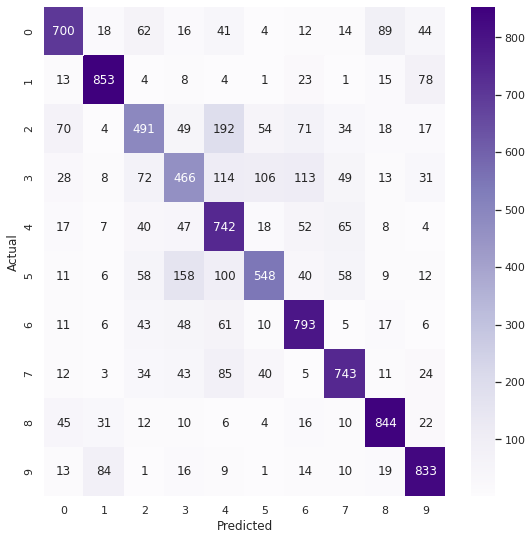

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, cnn_pred), fmt='d', annot=True, cmap=plt.cm.Purples)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

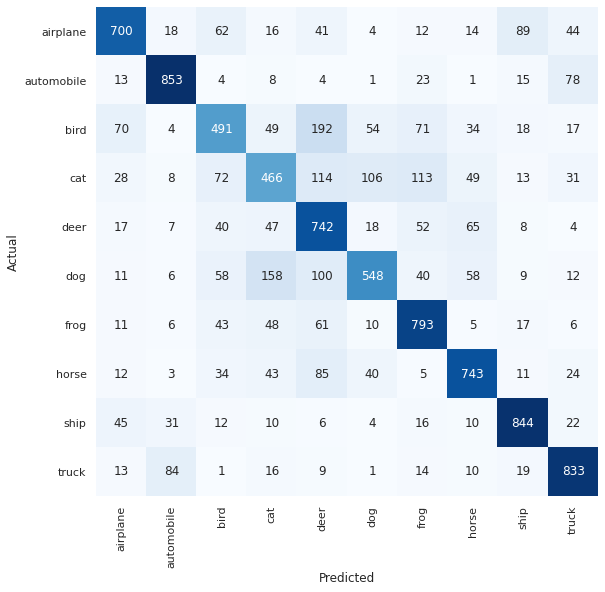

In [ ]:
cm = confusion_matrix(y_test, cnn_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
arr=[]
for i in X_train:
  i=i.ravel()
  arr.append(i)
arr2=[]
for i in X_test:
  i=i.ravel()
  arr2.append(i)

In [ ]:
df_test=pd.DataFrame(arr2)
df_test.shape

(10000, 1024)

In [ ]:
df=pd.DataFrame(arr)

In [ ]:
df.shape

(50000, 1024)

In [ ]:
data=pd.concat([df , df_test],axis=0)

In [ ]:
data.shape

(60000, 1024)

In [ ]:
y_train=ohe.inverse_transform(y_train)

<font color = 'yellow'><font size= 4>2. **Support Vector Machine (SVM)**

In [ ]:
svm=SVC(C=1.0, kernel='linear', gamma='scale', 
                cache_size=200, class_weight=None, verbose=True, max_iter=- 1,random_state=42)

In [ ]:
svm.fit(df, y_train.ravel())

[LibSVM]

KeyboardInterrupt: ignored

In [ ]:
svm_pred=svm.predict(df_test)

In [ ]:
print("----------------")
print("")
print("Accuracy using SVM classifier: ",accuracy_score(y_test , svm_pred)*100)
print("")
print("----------------")

<font color='yellow'><font size=4>3. **Linear Discriminant Analysis (LDA)**

In [ ]:
lda=LinearDiscriminantAnalysis()
lda.fit(df, y_train.ravel())

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
lda_pred=lda.predict(df_test)

In [ ]:
print("-----------------")
print("")
print("Accuracy using LDA: ",accuracy_score(y_test , lda_pred)*100)
print("")
print("-----------------")

-----------------

Accuracy using LDA:  28.299999999999997

-----------------


<font color='yellow'><font size=4>4. **XGBoost**

In [ ]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(df, y_train.ravel())

xg_pred = xgb_model.predict(df_test)

In [ ]:
print("---------------")
print("")
print("Accuracy using XGBoost: ", accuracy_score(y_test , xg_pred)*100)
print("")
print("---------------")

---------------

Accuracy using XGBoost:  38.1

---------------


<font color='yellow'><font size=4>**5. Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 42)
rfc.fit(df, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
rfc_pred=rfc.predict(df_test)

In [ ]:
print("---------------")
print("")
print("Accuracy using RF Classifier: ", accuracy_score(y_test , rfc_pred)*100)
print("")
print("---------------")

---------------

Accuracy using RF Classifier:  43.580000000000005

---------------


<font color='yellow'><font size=4>**6. Naive Bayes - Gaussian NB**

In [ ]:
gnb = GaussianNB().fit(df, y_train.ravel())
gnb_pred = gnb.predict(df_test)

In [ ]:
acc = gnb.score(y_test, gnb_pred)

In [ ]:
print("---------------")
print("")
print("Accuracy using Gaussian NB: ", acc*100)
print("")
print("---------------")

---------------

Accuracy using Gaussian NB:  5.5

---------------
